# Content

- Learning objectives

- Introduction

- Visual example

- Pandas: pd.merge() 

# Learning objectives

- Understand different types of joins

- Perform joins of datasets in pandas with one of the most common methods

# Introduction

Joining sets of data is one of the most common and useful task you are going to face. Generally speaking, the use of joins comes from the need to expand the features your original data by means of other data which share some content with yours. 

# Visual example

Let's start with a simple example and suppose we have two sets of different colors/opacity pairs, named respectively hot and cold, that we want to merge. Both sets contain a common color, yellow in this case, but also some common opacities (10% and 70%). 

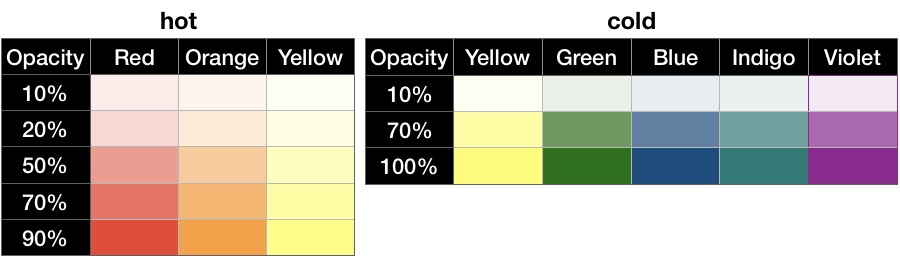

Let's assume we want to merge these sets using the color yellow as a common feature. There are four different types of joins we can perform. 

## Inner join

With this operation we want to merge the sets of colors but we keep only the ones having common opacities (row indexes).
In this example we are then left with one set having two rows (opacity 10% and 70%) of seven colors (all possible unique features).

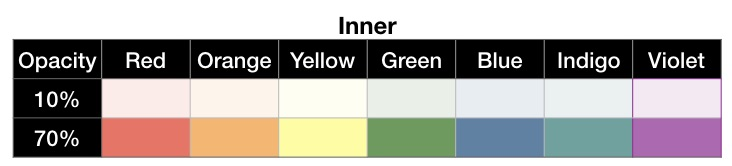


## Outer Join

Let's suppose now that we want all the samples available. We end up with six rows (all possible unique opacity values) and seven colors (all possible unique features). Note, however, that there are blank fields (NaN) corresponding to the informations that are missing in both original sets.

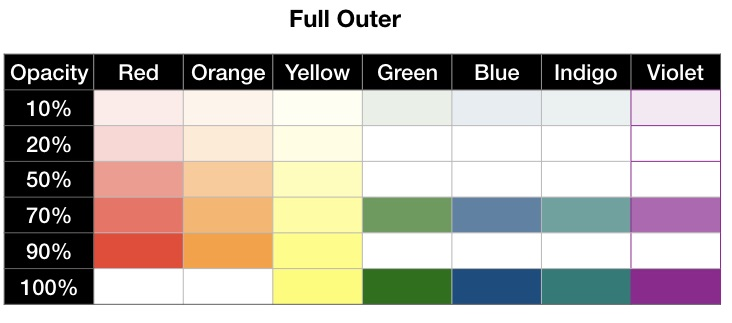

## Left join and right joins

What if we want to keep all the rows of either one of the two datasets? This can be done by means of left and right joins: with the left join we keep the rows of the dataset on the left (hot in this case) whereas with the right join we keep the rows of the dataset on the right (cold in this case). Also in this case there may be blank fields due to missing information in either one of the two dataset.

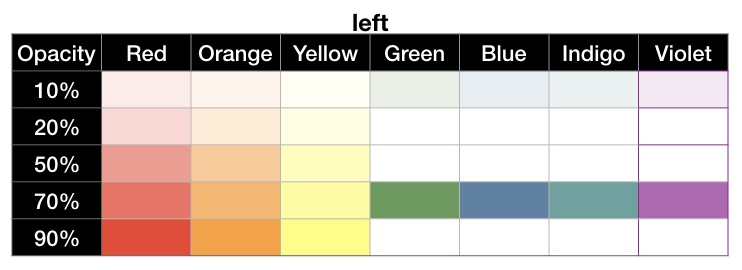

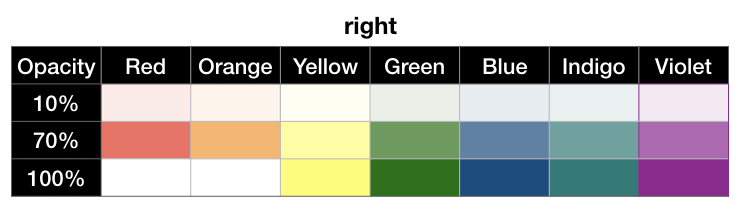

# Pandas: pd.merge()

There are different techniques one may use in python to join DataFrames or named Series: for a full documentation I reccomend the pandas User Guide on this topic (https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

Here we are going to focus on one method, pd.merge(), to reproduce our visual example. This method has the advantage of performing in-memory join operations idiomatically very similar to relational databases like SQL. Let's start by defining our initial datasets in pandas.

In [1]:
import pandas as pd

In [2]:
#Define dataframes using dictionaries

hotdata = {'Red':['r10', 'r20', 'r50', 'r70','r90'], 'Orange':['o10', 'o20', 'o50', 'o70','o90'],
           'Yellow':['y10', 'y20', 'y50', 'y70','y90']}
hotindexes = [0.1, 0.2, 0.5, 0.7, 0.9]

hot = pd.DataFrame(hotdata, index = hotindexes)

colddata = {'Yellow':['y10', 'y70','y100'], 'Green':['g10', 'g70','g100'],
            'Blue':['b10', 'b70','b100'], 'Indigo':['i10', 'i70','i100'],
            'Violet':['v10', 'v70', 'v100']}
coldindexes = [0.1, 0.7, 1.0]

hot = pd.DataFrame(hotdata, index = hotindexes)
cold = pd.DataFrame(colddata, index = coldindexes)

In [3]:
hot

,Red,Orange,Yellow
0.1,r10,o10,y10
0.2,r20,o20,y20
0.5,r50,o50,y50
0.7,r70,o70,y70
0.9,r90,o90,y90


In [4]:
cold

,Yellow,Green,Blue,Indigo,Violet
0.1,y10,g10,b10,i10,v10
0.7,y70,g70,b70,i70,v70
1.0,y100,g100,b100,i100,v100


### pd.merge(): parameters

Before starting with a new method is always a good idea to check the documentation. 

In [5]:
pd.merge?

The methods requires at least two parameters to be specified, i.e. the two dataframes or series you want to merge. By default the inner join is performed. What happens if we don't specify any parameter? Let's find it out.

In [6]:
default_join = pd.merge(hot,cold)
default_join

,Red,Orange,Yellow,Green,Blue,Indigo,Violet
0,r10,o10,y10,g10,b10,i10,v10
1,r70,o70,y70,g70,b70,i70,v70


The two dataset have been joined using as key the common column, Yellow, but the indexes have not been preserved. This happens in order to allow pandas to reindex the resulting dataframe. 
If we want to keep the indexes we can do that by specifying 'left_index=True', 'right_index=True' or both.

### Inner join

Now we are ready to reproduce our first visual example and keep the indexes:

In [7]:
inner = pd.merge(hot, cold, left_index=True, right_index=True)
inner

,Red,Orange,Yellow_x,Yellow_y,Green,Blue,Indigo,Violet
0.1,r10,o10,y10,y10,g10,b10,i10,v10
0.7,r70,o70,y70,y70,g70,b70,i70,v70


### Outer join

In order to get the outer join, we have to change the default parameter and set 'how=outer'

In [8]:
outer = pd.merge(hot, cold, how='outer', left_index=True, right_index=True)
outer

,Red,Orange,Yellow_x,Yellow_y,Green,Blue,Indigo,Violet
0.1,r10,o10,y10,y10,g10,b10,i10,v10
0.2,r20,o20,y20,NaN,NaN,NaN,NaN,NaN
0.5,r50,o50,y50,NaN,NaN,NaN,NaN,NaN
0.7,r70,o70,y70,y70,g70,b70,i70,v70
0.9,r90,o90,y90,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,y100,g100,b100,i100,v100


Note that the missing fields are filled with NaNs, and the indexing follows a numeric ordering. 

### Left/Right joins

It's easy to guess how the left and the right joins can be accomplished now...

In [9]:
left = pd.merge(hot, cold,  how='left', left_index=True, right_index=True)
left

,Red,Orange,Yellow_x,Yellow_y,Green,Blue,Indigo,Violet
0.1,r10,o10,y10,y10,g10,b10,i10,v10
0.2,r20,o20,y20,NaN,NaN,NaN,NaN,NaN
0.5,r50,o50,y50,NaN,NaN,NaN,NaN,NaN
0.7,r70,o70,y70,y70,g70,b70,i70,v70
0.9,r90,o90,y90,NaN,NaN,NaN,NaN,NaN


In [10]:
right = pd.merge(hot, cold, on='Yellow', how='right', left_index=True, right_index=True)
right

,Red,Orange,Yellow,Green,Blue,Indigo,Violet
0.1,r10,o10,y10,g10,b10,i10,v10
0.7,r70,o70,y70,g70,b70,i70,v70
1.0,NaN,NaN,NaN,g100,b100,i100,v100


# Try it yourself!

Create two dataframes: the first containing the names of some of your friends and their nationalities and their favourite color, the second containing again the names of some of your friends, their nationalities, their actual occupation. Which parameters would you use to get all the possible friends and all the available informations about them? What if you are interested mainly on the ones with a defined occupation?  

# A possible solution

In [11]:
f_c_n = {'Name':['Rita', 'Bene', 'Marcus', 'Paul'], 'Nationalities':['Italian', 'Swiss', 'German', 'English'],
           'Color':['Pink', 'Magenta', 'Black', 'Green']}
f_n_o = {'Name':['Rita', 'Anja', 'Marcus', 'Mike'], 'Nationalities':['Italian', 'Russian', 'German', 'Australian'],
           'Occupation':['Hair-dresser', 'Data Scientist', 'Developer', 'Actor']}

f_c_nDF = pd.DataFrame(f_c_n)

f_n_oDF = pd.DataFrame(f_n_o)

In [12]:
f_c_nDF

,Name,Nationalities,Color
0,Rita,Italian,Pink
1,Bene,Swiss,Magenta
2,Marcus,German,Black
3,Paul,English,Green


In [13]:
f_n_oDF

,Name,Nationalities,Occupation
0,Rita,Italian,Hair-dresser
1,Anja,Russian,Data Scientist
2,Marcus,German,Developer
3,Mike,Australian,Actor


In [14]:
all_friends_info = pd.merge(f_c_nDF,f_n_oDF, on=['Name', 'Nationalities'], how ='outer')

In [15]:
all_friends_info

,Name,Nationalities,Color,Occupation
0,Rita,Italian,Pink,Hair-dresser
1,Bene,Swiss,Magenta,NaN
2,Marcus,German,Black,Developer
3,Paul,English,Green,NaN
4,Anja,Russian,NaN,Data Scientist
5,Mike,Australian,NaN,Actor


In [16]:
friends_with_occupation = pd.merge(f_c_nDF,f_n_oDF, on=['Name', 'Nationalities'], how ='right')

In [17]:
friends_with_occupation

,Name,Nationalities,Color,Occupation
0,Rita,Italian,Pink,Hair-dresser
1,Marcus,German,Black,Developer
2,Anja,Russian,NaN,Data Scientist
3,Mike,Australian,NaN,Actor
